<h1> Plots Soil Data

---

<h3> Jack Colwell and Sujan Pal
    
    Data from: loggers located at ATMOS

<h2> Imports

---

In [2]:
import numpy as np
import pandas as pd
import time
from datetime import timedelta, date
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")

<h2> Read the Data and Resample

---

In [3]:
# Read the data to plot
data = pd.read_csv(r'C:\Users\colwe\OneDrive\Desktop\Argonne\ATMOS484\ATMOS484-master\soildata_output.csv',parse_dates=['datetime'],index_col=['datetime'])
data_SM = data.iloc[:,0:64]
data_SM_daily = data_SM.resample('D').mean()
data_ST = data.iloc[:,65:-1]
data_ST_daily = data_ST.resample('D').mean()

<h2> Drop NaN Values

---

In [4]:
data_SM_daily.dropna(how='all')
data_ST_daily.dropna(how='all')

,Tsoil_01,Tsoil_02,Tsoil_12,Tsoil_11,Tsoil_10,Tsoil_20,Tsoil_21,Tsoil_22,Tsoil_32,Tsoil_31,...,Tsoil_46,Tsoil_47,Tsoil_57,Tsoil_56,Tsoil_55,Tsoil_65,Tsoil_66,Tsoil_67,Tsoil_77,Tsoil_76
datetime,,,,,,,,,,,,,,,,,,,,,
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,19.590000,19.221316,20.334737,19.088158,...,19.015000,18.991579,20.160000,18.888158,18.227895,18.417632,19.523158,18.727368,18.540000,NaN
2022-06-02,NaN,NaN,NaN,NaN,NaN,NaN,18.786667,18.540625,19.316458,18.494167,...,18.047083,18.161250,19.415000,18.093958,17.441875,17.937083,18.802917,18.123958,17.849583,NaN
2022-06-03,NaN,NaN,NaN,NaN,NaN,NaN,18.167917,17.928958,18.593958,18.028333,...,17.200417,17.594792,18.718125,17.482292,16.896042,17.513125,18.235417,17.662292,17.422708,NaN
2022-06-04,NaN,NaN,NaN,NaN,NaN,NaN,17.424167,17.255208,17.623542,17.481250,...,16.573750,16.808333,17.908125,16.868750,16.228333,16.947292,17.455833,17.022083,16.872708,NaN
2022-06-05,NaN,NaN,NaN,NaN,NaN,NaN,16.861458,16.844167,17.346458,16.923125,...,16.282292,16.500417,17.492292,16.445833,15.815208,16.338542,16.958333,16.522500,16.278125,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28,NaN,NaN,NaN,NaN,NaN,15.982500,14.914375,15.343542,16.040417,15.603125,...,14.465833,14.757917,31.633542,14.401875,33.929792,14.470000,15.093958,14.473542,15.002917,14.908333
2023-05-29,NaN,NaN,NaN,NaN,NaN,16.533333,15.394375,15.808958,16.599375,16.078958,...,14.921667,15.268542,33.307292,14.884167,36.067292,14.941042,15.578125,14.966042,15.461458,15.439583
2023-05-30,NaN,NaN,NaN,NaN,NaN,17.439583,16.061250,16.426042,17.405000,16.747292,...,15.610000,15.984167,35.040000,15.558958,41.281875,15.502708,16.282708,15.597708,16.058958,16.185625


<h1> Plot Soil Data

---

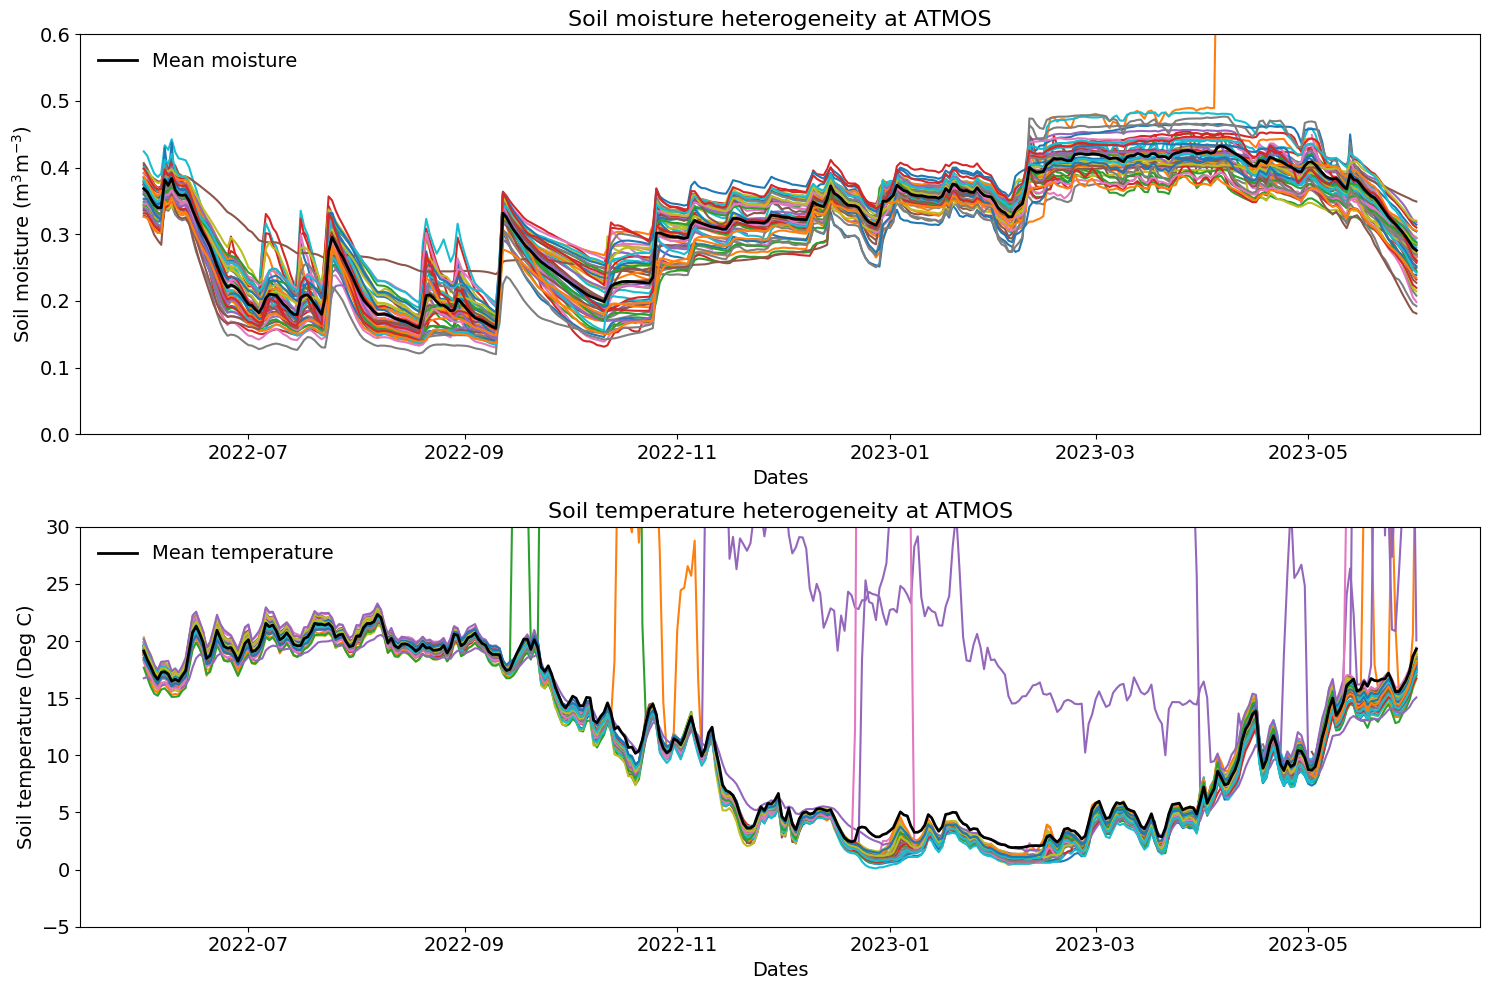

In [6]:
# Defines the directory where you want to save the figure
save_directory = r'C:\Users\colwe\OneDrive\Desktop\Argonne\Soil_Data\Soil_Figures'

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

fig,ax1 = plt.subplots(nrows=2,ncols=1,figsize=(15,10))
ax = ax1[0]
ax.plot(data_SM_daily.index,data_SM_daily)
ax.plot(data_SM_daily.index,data_SM_daily.apply(pd.Series.describe, axis=1)['mean'],color='black', label = 'Mean moisture', lw=2)
#ax.fill_between(data_SM_daily.index,data_SM_daily.apply(pd.Series.describe, axis=1)['25%'],data_SM_daily.apply(pd.Series.describe, axis=1)['75%'],color='black',alpha=0.4)
ax.set_xlabel('Dates', fontsize =14)
ax.set_ylabel('Soil moisture ($\mathrm{m}^{3}$$\mathrm{m}^{-3}$)', color='black', fontsize =14)
#ax.set_xlim([data_SM_daily.index[0],data_SM_daily.index[-22]])
ax.set_ylim([0,0.6])
ax.set_title('Soil moisture heterogeneity at ATMOS', fontsize =16)
ax.legend(loc = 'upper left', frameon=False, fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

ax = ax1[1]

ax.plot(data_ST_daily.index,data_ST_daily)
ax.plot(data_ST_daily.index,data_ST_daily.apply(pd.Series.describe, axis=1)['mean'],color='black',label='Mean temperature',lw =2)
#ax.fill_between(data_ST_daily.index,data_ST_daily.apply(pd.Series.describe, axis=1)['25%'],data_ST_daily.apply(pd.Series.describe, axis=1)['75%'],color='black',alpha=0.4)
ax.set_xlabel('Dates', fontsize =14)
ax.set_ylabel('Soil temperature (Deg C)', color='black', fontsize =14)
ax.legend(loc = 'upper left', frameon=False, fontsize=14)
ax.set_ylim([-5,30])
# ax.set_xlim([data_ST_daily.index[0],data_ST_daily.index[-22]])
ax.set_title('Soil temperature heterogeneity at ATMOS', fontsize =16)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

# Define the filename and full path to save the figure
filename = 'ATMOS_Soil_Moisture.png'
save_path = os.path.join(save_directory, filename)

plt.savefig('ATMOS_Soil_Moisture.png', dpi=300)